<a href="https://colab.research.google.com/github/clionelove123/temp_test/blob/main/Chap_4_machinelearning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# MNIST 데이터를 다운로드 합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# 이미지들을 float32 데이터 타입으로 변경합니다.
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
# 28*28 형태의 이미지를 784차원으로 flattening 합니다.
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
x_train, x_test = x_train / 255., x_test / 255.
# 레이블 데이터에 one-hot encoding을 적용합니다.
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test, depth=10)

In [3]:
# tf.data API를 이용해서 데이터를 섞고 batch 형태로 가져옵니다.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(100)
train_data_iter = iter(train_data)

In [4]:
# Softmax Regression 모델을 위한 tf.Variable들을 정의합니다.
W = tf.Variable(tf.zeros(shape=[784, 10]))
b = tf.Variable(tf.zeros(shape=[10]))

In [5]:
# Softmax Regression 모델을 정의합니다.
@tf.function
def softmax_regression(x):
  logits = tf.matmul(x, W) + b
  return tf.nn.softmax(logits)

In [6]:
# cross-entropy 손실 함수를 정의합니다.
@tf.function
def cross_entropy_loss(y_pred, y):
  return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_pred), axis=[1]))
  #return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logtis, labels=y)) # tf.nn.softmax_cross_entropy_with_logits API를 이용한 구현

In [7]:
# 모델의 정확도를 출력하는 함수를 정의합니다.
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

In [8]:
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(0.5)

In [9]:
# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    y_pred = softmax_regression(x)
    loss = cross_entropy_loss(y_pred, y)
  gradients = tape.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [10]:
# 1000번 반복을 수행하면서 최적화를 수행합니다.
for i in range(1000):
  batch_xs, batch_ys = next(train_data_iter)
  train_step(batch_xs, batch_ys)
  if i<10:
    print("정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test))
  else:
    if (i%100)<1:
      print("정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test))

정확도(Accuracy): 0.266200
정확도(Accuracy): 0.543100
정확도(Accuracy): 0.490000
정확도(Accuracy): 0.649700
정확도(Accuracy): 0.627800
정확도(Accuracy): 0.664200
정확도(Accuracy): 0.708600
정확도(Accuracy): 0.724000
정확도(Accuracy): 0.776900
정확도(Accuracy): 0.759400
정확도(Accuracy): 0.892800
정확도(Accuracy): 0.903900
정확도(Accuracy): 0.910900
정확도(Accuracy): 0.909900
정확도(Accuracy): 0.914900
정확도(Accuracy): 0.914500
정확도(Accuracy): 0.915500
정확도(Accuracy): 0.917200
정확도(Accuracy): 0.916700


In [11]:
# 학습이 끝나면 학습된 모델의 정확도를 출력합니다.
print("정확도(Accuracy): %f" % compute_accuracy(softmax_regression(x_test), y_test)) # 정확도 : 약 91%

정확도(Accuracy): 0.917100


In [13]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from google.colab import files
uploaded = files.upload()

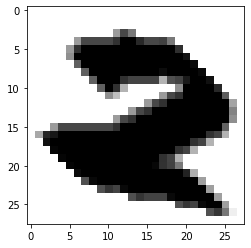

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
bmpSample = mpimg.imread('temp1.bmp')
bmpSample_2 = mpimg.imread('temp2.bmp')
bmpSample_3 = mpimg.imread('temp3.png')

#plt.figure(figsize=(15, 10))
#plt.subplot(1,3,1)
#plt.title('bmp')


plt.imshow(bmpSample)
plt.imshow(bmpSample_3)



In [16]:
bmpSample_t=bmpSample.astype('float32')
bmpSample_t_2=bmpSample_2.astype('float32')
bmpSample_t_3=bmpSample_3.astype('float32')

bmpSample_t = bmpSample_t.reshape([-1, 784])
bmpSample_t_2 = bmpSample_t_2.reshape([-1, 784])
bmpSample_t_3 = bmpSample_t_3.reshape([-1, 784])
# [0, 255] 사이의 값을 [0, 1]사이의 값으로 Normalize합니다.
bmpSample_t = bmpSample_t / 255.
bmpSample_t_2 = bmpSample_t_2 / 255.
bmpSample_t_3 = bmpSample_t_3 / 255.





In [17]:
softmax_regression(bmpSample_t)


<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[1.0757283e-06, 5.0620273e-15, 1.3161196e-02, 9.3298656e-01,
        2.3500097e-12, 4.2180624e-02, 4.2380108e-07, 6.9296641e-07,
        1.1669329e-02, 2.7487136e-08],
       [1.5009239e-05, 1.2896256e-13, 2.0502019e-01, 7.3776901e-01,
        1.7772693e-10, 2.6013639e-02, 7.9118297e-07, 4.4299646e-05,
        3.1134486e-02, 2.4859269e-06],
       [2.0920170e-06, 3.4984383e-15, 5.2524939e-02, 8.5389882e-01,
        5.9931079e-12, 8.7320484e-02, 3.7722745e-07, 3.9465033e-07,
        6.2528239e-03, 1.0087224e-07]], dtype=float32)>

In [18]:
softmax_regression(bmpSample_t_2)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[1.3014633e-03, 3.4723736e-14, 8.7622333e-01, 1.1507258e-01,
        2.7876135e-11, 7.3086536e-03, 2.4142466e-05, 4.9631005e-08,
        6.9660491e-05, 7.3961694e-08],
       [2.0516009e-04, 6.0264462e-16, 3.6963206e-02, 1.3884853e-01,
        4.1217321e-11, 8.1375462e-01, 3.7564573e-07, 1.1955281e-06,
        1.0226850e-02, 5.9346696e-08],
       [2.1508770e-06, 3.5561539e-15, 5.4044385e-02, 8.5261130e-01,
        5.2775913e-12, 8.7104715e-02, 4.2446359e-07, 3.9368865e-07,
        6.2365821e-03, 9.8889387e-08]], dtype=float32)>

In [19]:
softmax_regression(bmpSample_t_3)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.05523333, 0.10560112, 0.09519833, 0.06527855, 0.08079458,
        0.2931819 , 0.07054529, 0.14963607, 0.02076028, 0.06377064],
       [0.05530381, 0.10736923, 0.09369408, 0.06387237, 0.08275016,
        0.2902568 , 0.07108469, 0.15037277, 0.02031534, 0.06498076],
       [0.05533944, 0.106079  , 0.09818018, 0.06687187, 0.0798014 ,
        0.28893688, 0.07105696, 0.14868905, 0.02022959, 0.06481564]],
      dtype=float32)>